## One sample T-test

The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean

In [5]:
from scipy.stats import ttest_1samp
import numpy as np
age = [20,25,30,31,23,45,32,43,32,23,24,19,28,24,30,30,23,22,20,20,20,20,21,20]
print(age)
ages_avg = np.mean(age)
print(ages_avg)
t, pval = ttest_1samp(age, 27)#code for t test 1 sample
print('The Pvalues is: ',pval)
print('The t-stastics is: ',t)
if pval < 0.05:    # significance is 0.05
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

[20, 25, 30, 31, 23, 45, 32, 43, 32, 23, 24, 19, 28, 24, 30, 30, 23, 22, 20, 20, 20, 20, 21, 20]
26.041666666666668
The Pvalues is:  0.5116732890033738
The t-stastics is:  -0.6665784065545997
Failed to reject the null hypothesis


## 2 Sample T-Test

Compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different

In [42]:
from scipy.stats import ttest_ind
import numpy as np
data1 = np.random.uniform(low=20, high=25.3, size=(20,))
data2 = np.random.uniform(low=20.5, high=26.5, size=(20,))
print("\ndata1:-\n")
print(data1)
print("\ndata2:-\n")
print(data2)
data1_avg = np.mean(data1)
data2_avg = np.mean(data2)
print("\ndata1 mean value:",data1_avg)
print("data2 mean value:",data2_avg)
data1_std = np.std(data1)
data2_std = np.std(data2)
print("\ndata1 std value:",data1_std)
print("data2 std value:",data2_std)
ttest,pval = ttest_ind(data1,data2)
print("\nThe P-value is: ",pval)
if pval <0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")


data1:-

[21.81681438 24.1336502  21.61571188 22.97808827 23.44900548 23.99550479
 22.11258987 23.96599509 25.19723822 21.56388089 25.24462435 24.10215929
 23.96085175 22.41254463 24.65645031 23.77098144 22.02365582 20.00098114
 25.00039617 22.37214639]

data2:-

[22.49252191 21.00996226 22.53924467 24.6912421  23.80301129 20.69367094
 24.45329109 23.09884721 23.58235657 24.38929443 20.61145057 24.16709017
 26.3408864  23.78518587 25.74750853 25.80649553 25.23918124 21.80024425
 23.31872372 25.53943986]

data1 mean value: 23.218663517405993
data2 mean value: 23.655482430441907

data1 std value: 1.3901788279774967
data2 std value: 1.678191482799432

The P-value is:  0.3877500386528432
Failed to reject the null hypothesis


## Paired Sample T-Test

Paired sampled t-test :- The paired sample t-test is also called dependent sample t-test. It’s an univariate test that tests for a significant difference between 2 related variables

In [44]:
import pandas as pd
from scipy import stats
df = pd.read_csv("blood_pressure.csv")
df.head()

patient   sex agegrp  bp_before  bp_after
0        1  Male  30-45        143       153
1        2  Male  30-45        163       170
2        3  Male  30-45        153       168
3        4  Male  30-45        153       142
4        5  Male  30-45        146       141

In [46]:
ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject the null hypothesis")

0.0011297914644840823
reject null hypothesis


## One Sample Z Test

In [12]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=159)  #SampleMean
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject the null hypothesis")

0.014185854025524306
reject null hypothesis


## 2 Sample Z Test

In [48]:
ztest ,pval1 = stests.ztest(df['bp_before'], x2=df['bp_after'], value=0,alternative='two-sided')
print(pval1)
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject the null hypothesis")

0.002162306611369422
reject null hypothesis


### One Way ANOVA

In [7]:
## anova = analysis of variance
import pandas as pd
df_anova = pd.read_csv('PlantGrowth.csv')
df_anova = df_anova[['weight','group']]
grps = pd.unique(df_anova.group.values)
df_anova

weight group
0     4.17  ctrl
1     5.58  ctrl
2     5.18  ctrl
3     6.11  ctrl
4     4.50  ctrl
5     4.61  ctrl
6     5.17  ctrl
7     4.53  ctrl
8     5.33  ctrl
9     5.14  ctrl
10    4.81  trt1
11    4.17  trt1
12    4.41  trt1
13    3.59  trt1
14    5.87  trt1
15    3.83  trt1
16    6.03  trt1
17    4.89  trt1
18    4.32  trt1
19    4.69  trt1
20    6.31  trt2
21    5.12  trt2
22    5.54  trt2
23    5.50  trt2
24    5.37  trt2
25    5.29  trt2
26    4.92  trt2
27    6.15  trt2
28    5.80  trt2
29    5.26  trt2

In [52]:
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}

In [54]:
d_data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [56]:
Ftest, pval = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject the null hypothesis")

p-value for significance is:  0.0159099583256229
reject null hypothesis


ASSIGNMENT: DOC LINK: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

Here is an example on a shell measurement (the length of the anterior adductor muscle scar, standardized by dividing by length) in the mussel Mytilus trossulus from five locations: Tillamook, Oregon; Newport, Oregon; Petersburg, Alaska; Magadan, Russia; and Tvarminne, Finland, taken from a much larger data set used in McDonald et al. (1991)

In [21]:
from scipy.stats import f_oneway
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
             0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
           0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F,p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)
print("P Value calculated is ", p)

if p<0.05:
    print("We will reject the null hypothesis")
else:
    print("failed to reject the null hypothesis")

P Value calculated is  0.0002812242314534544
We will reject the null hypothesis


## Two Way ANOVA

In [58]:
import numpy as np
import pandas as pd

#create data
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water) and C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F    PR(>F)
C(water)             8.533333   1.0  14.532751  0.000762
C(sun)              24.866667   2.0  21.174672  0.000003
C(water)and C(sun)  24.866667   2.0  21.174672  0.000003
Residual            15.266667  26.0        NaN       NaN

## Assignment
1- Create the decision block for above code

2- Explore chi square test from scipy.stats: https://docs.scipy.org/doc/scipy-1.16.1/reference/generated/scipy.stats.chisquare.html

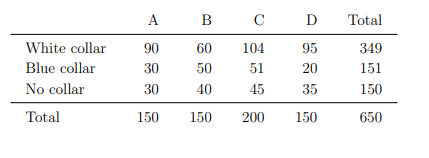